1. Crear un ambiente de trabajo (.ipynb) basado en PYTHON3 en Google Collab y llamarle Tarea-2.ipynb, con las librerías que considere oportuno.

In [1]:
%matplotlib inline
import torch as torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import plotly.graph_objects as go
from math import e
from mpl_toolkits import mplot3d
import seaborn as sns
import math
from numpy import vstack
from numpy import sqrt
from numpy import array
from pandas import read_csv, notnull
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import MSELoss
from torch.nn.init import xavier_uniform_
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.utils import check_random_state, check_array
from sklearn.model_selection import ParameterGrid
from sklearn.dummy import DummyRegressor
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor

2. Indique en qué consisten los métodos de ensamble y cuáles son sus principales características.

    Los métodos de ensamble se componen de conjuntos de algoritmos de aprendizaje estadístico que buscan predecir un nuevo dato y basado en un dato dado x. Los algoritmos de ensamble se utilizan para algoritmos de recomendación, clasificación de imágenes, conducción autónoma y procesamiento de lenguaje natural.
    
    Normalmente se definen en dos tipos: supervisados y no supervidos. El aprendizaje estadístico no supervisado estos normalmente se utilizan para predecir condiciones futuras. Los algoritmos supervisados se utilizan para clasificación y etiquetado de variables.
    
    Utilizar métodos de ensamble puede mejor el rendimiento a la hora de realizar predicciones y al mismo tiempo reduce la dispersión de las predicciones.
    
    
    Dentro de los métodos de aprendizaje estadisticos tenemos los siguientes ejemplos: Promedio de Modelos Bayesianos, Votación de la mayoría del comité, Combinación ingenua Bayesiana, Bagging, Random Forest, Boosting y Stacking.


3. Elegir un conjunto de datos de mediana complejidad pero que no sea trivial, y aplicarle 
algunos algoritmos supervisados de su elección, de la siguiente forma: 

a.  Elegir el dataset trazar la estrategia del problema basado en su naturaleza 
(regresión o clasificación).

Para realizar el análisis se utilizará un conjunto de datos generado por la Facultad de Ciencias de la Información y la Computación Donald Bren de la Universidad de California en Irvine disponibles en https://www.kaggle.com/rodolfomendes/abalone-dataset.   

El conjunto de datos puede ser utilizado para entrenar modelos para predecir la edad de los abulones (moluscos también conocidos como orejas de mar) a partir de mediciones físicas. Comúnmente, la edad de un abulón se determina cortando la concha a través del cono, tiñéndola y contando el número de anillos a través de un microscópio, una tarea que requiere mucho tiempo. Sin embargo, es posible utilizar datos morfológicos del individuo, que son más fáciles de obtener y permiten predecir la edad este. Una descripción detallada de los datos está disponible en https://archive.ics.uci.edu/ml/datasets/abalone. 

In [2]:
# Se utilza panda para cargar el csv
df = pd.read_csv('datos/Abalone.csv')
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000     17
1     0.740     0.600   0.195  1.9740   0.4085       0.7100     16
2     0.735     0.590   0.225  1.7560   0.3405       0.5800     21
3     0.730     0.595   0.230  2.8255   0.4190       0.8970     17
4     0.725     0.560   0.210  2.1410   0.3980       1.0050     18
..      ...       ...     ...     ...      ...          ...    ...
982   0.155     0.105   0.050  0.0175   0.0035       0.0050      4
983   0.150     0.100   0.025  0.0150   0.0040       0.0050      2
984   0.130     0.100   0.030  0.0130   0.0030       0.0040      3
985   0.110     0.090   0.030  0.0080   0.0020       0.0030      3
986   0.075     0.055   0.010  0.0020   0.0005       0.0015      1

[987 rows x 7 columns]


b.  De ser necesario un pre-procesado, debe llevarlo a cabo

Primero se realizó (Exploratory Data Analysis)

In [3]:
# Desplegar la lista de columnas 
df.columns
print(df.dtypes)

Length         float64
Diameter       float64
Height         float64
Whole          float64
Viscera        float64
Shellweight    float64
Rings            int64
dtype: object


In [4]:
# Pasar la columna Ring de float a int
df['Rings'] = df['Rings'].astype(float)

In [5]:
# Generar datos estadísticos utilizando Pandas
df_describe = pd.DataFrame(df)
df_describe.describe()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,0.489630,0.383678,0.133131,0.712899,0.155166,0.218105,19.567376
std,0.120444,0.101893,0.039270,0.454114,0.097596,0.144131,290.580810
min,0.075000,0.055000,0.010000,0.002000,0.000500,0.001500,-1300.000000
25%,0.415000,0.322500,0.105000,0.354500,0.074000,0.105000,8.000000
50%,0.505000,0.400000,0.135000,0.663000,0.146000,0.200000,10.000000
75%,0.580000,0.455000,0.160000,0.996500,0.220250,0.305000,13.000000
max,0.745000,0.600000,0.240000,2.825500,0.541000,1.005000,9000.000000


In [6]:
# Tamaño del conjunto
df.shape

(987, 7)

In [7]:
# Dimension del conjunto
df.ndim

2

In [8]:
# Retornar las primeras 5 filas del conjunto
df.head()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17.0
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16.0
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21.0
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17.0
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18.0


In [9]:
# Retornar las últimas 5 filas del conjunto
df.tail()

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
982,0.155,0.105,0.050,0.0175,0.0035,0.0050,4.0
983,0.150,0.100,0.025,0.0150,0.0040,0.0050,2.0
984,0.130,0.100,0.030,0.0130,0.0030,0.0040,3.0
985,0.110,0.090,0.030,0.0080,0.0020,0.0030,3.0
986,0.075,0.055,0.010,0.0020,0.0005,0.0015,1.0


In [10]:
#Desplejar la cantidad de valores únicos por columna
df.nunique( )

Length         119
Diameter       101
Height          46
Whole          852
Viscera        522
Shellweight    311
Rings           28
dtype: int64

In [11]:
#Retorna el número de valores nulos de cada columna
df.isnull( ).sum( )

Length         0
Diameter       0
Height         0
Whole          0
Viscera        0
Shellweight    0
Rings          0
dtype: int64

In [12]:
#Cantidad de nan de todo el dataframe
df.isna().sum().sum()

0

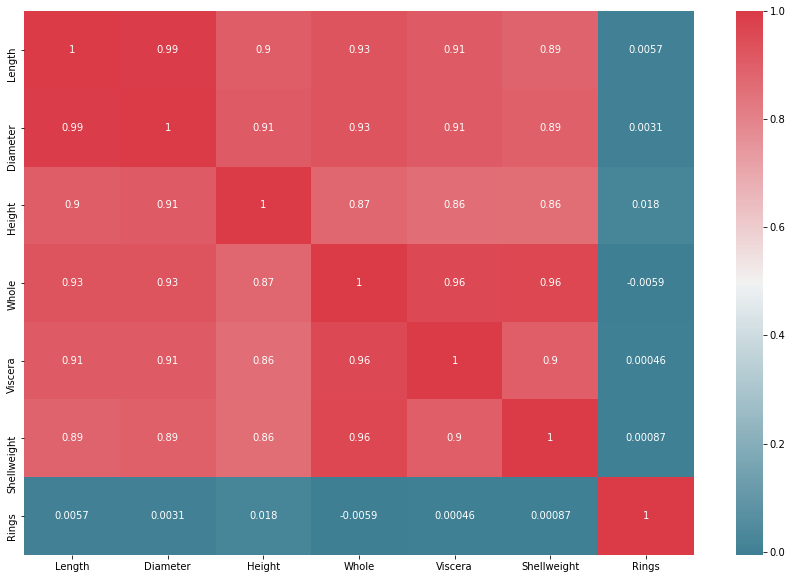

In [13]:
#Mapa de calor 
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

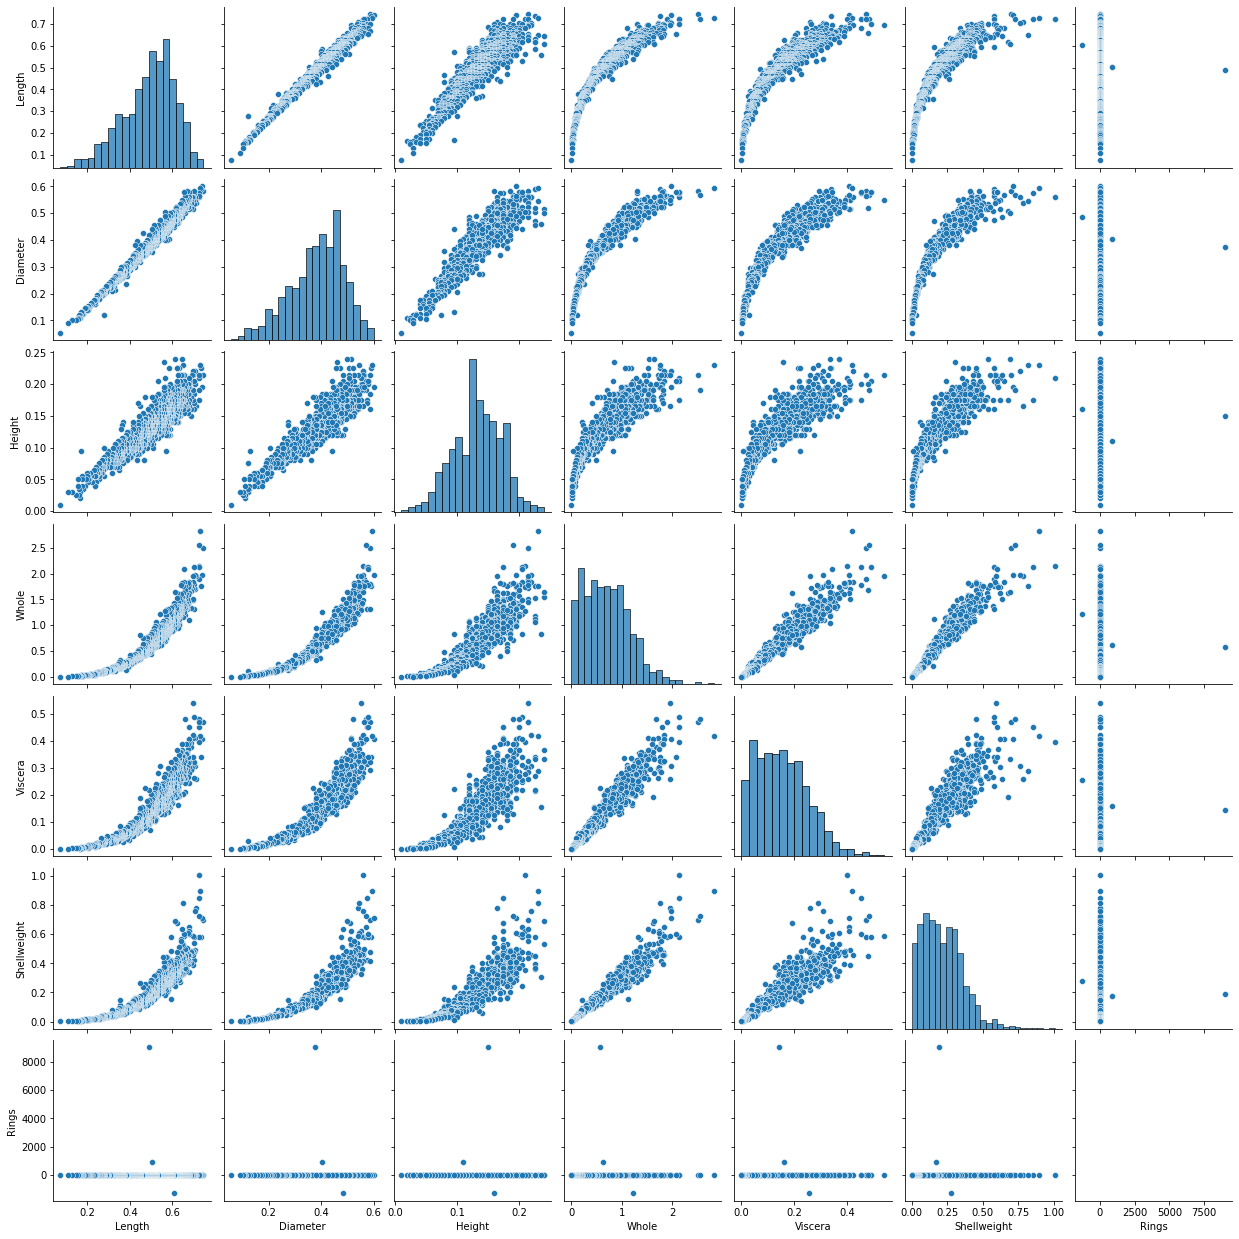

In [14]:
# La siguiente gráfica presenta la relación entre pares de variables. 
# En la diagonal se ven los histogramas de cada variable
# La segunda fila presenta la relación entre la variable precio y todas las demás
sns.pairplot(df);

In [15]:
#Retorna las primeras 15 filas con mayor Length
df.nlargest(15,"Length")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17.0
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16.0
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21.0
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17.0
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18.0
5,0.725,0.570,0.190,2.5500,0.4830,0.725,14.0
6,0.725,0.575,0.175,2.1240,0.4515,0.850,20.0
7,0.725,0.565,0.215,1.8910,0.4725,0.580,16.0
8,0.710,0.540,0.165,1.9590,0.2610,0.780,18.0
9,0.705,0.550,0.200,1.7095,0.4115,0.490,13.0


In [16]:
#Retorna las primeras 15 filas con menor Length
df.nsmallest(15,"Length")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
986,0.075,0.055,0.010,0.0020,0.0005,0.0015,1.0
985,0.110,0.090,0.030,0.0080,0.0020,0.0030,3.0
984,0.130,0.100,0.030,0.0130,0.0030,0.0040,3.0
983,0.150,0.100,0.025,0.0150,0.0040,0.0050,2.0
981,0.155,0.110,0.040,0.0155,0.0030,0.0050,3.0
982,0.155,0.105,0.050,0.0175,0.0035,0.0050,4.0
979,0.160,0.120,0.035,0.0210,0.0045,0.0050,5.0
980,0.160,0.110,0.025,0.0180,0.0055,0.0050,3.0
977,0.165,0.120,0.030,0.0215,0.0050,0.0050,3.0
978,0.165,0.110,0.020,0.0190,0.0025,0.0050,4.0


In [17]:
#Retorna las primeras 15 filas con mayor Length
df.nlargest(15,"Diameter")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16.0
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17.0
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21.0
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17.0
14,0.700,0.585,0.185,1.8075,0.3215,0.475,29.0
39,0.670,0.585,0.160,1.3090,0.2945,0.413,10.0
12,0.700,0.580,0.205,2.1300,0.4900,0.580,20.0
27,0.680,0.580,0.200,1.7870,0.4530,0.600,19.0
58,0.655,0.580,0.205,2.0805,0.3415,0.601,17.0
6,0.725,0.575,0.175,2.1240,0.4515,0.850,20.0


In [18]:
#Retorna las primeras 15 filas con menor Diameter
df.nsmallest(15,"Diameter")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
986,0.075,0.055,0.010,0.0020,0.0005,0.0015,1.0
985,0.110,0.090,0.030,0.0080,0.0020,0.0030,3.0
983,0.150,0.100,0.025,0.0150,0.0040,0.0050,2.0
984,0.130,0.100,0.030,0.0130,0.0030,0.0040,3.0
982,0.155,0.105,0.050,0.0175,0.0035,0.0050,4.0
978,0.165,0.110,0.020,0.0190,0.0025,0.0050,4.0
980,0.160,0.110,0.025,0.0180,0.0055,0.0050,3.0
981,0.155,0.110,0.040,0.0155,0.0030,0.0050,3.0
926,0.280,0.120,0.075,0.1170,0.0290,0.0345,4.0
977,0.165,0.120,0.030,0.0215,0.0050,0.0050,3.0


In [19]:
#Retorna las primeras 15 filas con mayor Height
df.nlargest(15,"Height")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
69,0.645,0.515,0.240,1.5415,0.3690,0.535,13.0
143,0.610,0.500,0.240,1.6420,0.3345,0.690,18.0
322,0.560,0.460,0.235,0.8395,0.1570,0.305,12.0
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17.0
60,0.650,0.545,0.230,1.7520,0.2895,0.815,16.0
2,0.735,0.590,0.225,1.7560,0.3405,0.580,21.0
91,0.630,0.505,0.225,1.5250,0.3335,0.450,15.0
124,0.620,0.520,0.225,1.1835,0.2700,0.395,23.0
125,0.620,0.470,0.225,1.1150,0.2145,0.360,15.0
224,0.585,0.455,0.225,1.0550,0.2210,0.365,15.0


In [20]:
#Retorna las primeras 15 filas con menor Height
df.nsmallest(15,"Height")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
986,0.075,0.055,0.010,0.0020,0.0005,0.0015,1.0
978,0.165,0.110,0.020,0.0190,0.0025,0.0050,4.0
980,0.160,0.110,0.025,0.0180,0.0055,0.0050,3.0
983,0.150,0.100,0.025,0.0150,0.0040,0.0050,2.0
977,0.165,0.120,0.030,0.0215,0.0050,0.0050,3.0
984,0.130,0.100,0.030,0.0130,0.0030,0.0040,3.0
985,0.110,0.090,0.030,0.0080,0.0020,0.0030,3.0
972,0.180,0.125,0.035,0.0265,0.0055,0.0085,4.0
979,0.160,0.120,0.035,0.0210,0.0045,0.0050,5.0
954,0.235,0.160,0.040,0.0480,0.0180,0.0150,5.0


In [21]:
#Retorna las primeras 15 filas con mayor Shellweight
df.nlargest(15,"Shellweight")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
4,0.725,0.560,0.210,2.1410,0.3980,1.005,18.0
3,0.730,0.595,0.230,2.8255,0.4190,0.897,17.0
6,0.725,0.575,0.175,2.1240,0.4515,0.850,20.0
60,0.650,0.545,0.230,1.7520,0.2895,0.815,16.0
8,0.710,0.540,0.165,1.9590,0.2610,0.780,18.0
10,0.705,0.560,0.220,1.9810,0.3085,0.760,14.0
5,0.725,0.570,0.190,2.5500,0.4830,0.725,14.0
1,0.740,0.600,0.195,1.9740,0.4085,0.710,16.0
0,0.745,0.585,0.215,2.4990,0.4720,0.700,17.0
143,0.610,0.500,0.240,1.6420,0.3345,0.690,18.0


In [22]:
#Retorna las primeras 15 filas con menor Shellweight
df.nsmallest(15,"Shellweight")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
986,0.075,0.055,0.010,0.0020,0.0005,0.0015,1.0
985,0.110,0.090,0.030,0.0080,0.0020,0.0030,3.0
984,0.130,0.100,0.030,0.0130,0.0030,0.0040,3.0
975,0.175,0.125,0.040,0.0240,0.0060,0.0050,4.0
977,0.165,0.120,0.030,0.0215,0.0050,0.0050,3.0
978,0.165,0.110,0.020,0.0190,0.0025,0.0050,4.0
979,0.160,0.120,0.035,0.0210,0.0045,0.0050,5.0
980,0.160,0.110,0.025,0.0180,0.0055,0.0050,3.0
981,0.155,0.110,0.040,0.0155,0.0030,0.0050,3.0
982,0.155,0.105,0.050,0.0175,0.0035,0.0050,4.0


In [23]:
### Part 2 - Data - Preprocessing

In [24]:
#Eliminar las filas que contienen un valor nulos
df = df.dropna(thresh=6)

In [25]:
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000   17.0
1     0.740     0.600   0.195  1.9740   0.4085       0.7100   16.0
2     0.735     0.590   0.225  1.7560   0.3405       0.5800   21.0
3     0.730     0.595   0.230  2.8255   0.4190       0.8970   17.0
4     0.725     0.560   0.210  2.1410   0.3980       1.0050   18.0
..      ...       ...     ...     ...      ...          ...    ...
982   0.155     0.105   0.050  0.0175   0.0035       0.0050    4.0
983   0.150     0.100   0.025  0.0150   0.0040       0.0050    2.0
984   0.130     0.100   0.030  0.0130   0.0030       0.0040    3.0
985   0.110     0.090   0.030  0.0080   0.0020       0.0030    3.0
986   0.075     0.055   0.010  0.0020   0.0005       0.0015    1.0

[987 rows x 7 columns]


In [26]:
# Borrar registros con valores 0 en columnas donde no 
# tiene sentido.
df= df[df['Length'] != 0]
df= df[df['Diameter'] != 0]
df= df[df['Height'] != 0]
df= df[df['Whole'] != 0]
df= df[df['Viscera'] != 0]
df= df[df['Shellweight'] != 0]
df= df[df['Rings'] != 0]

In [27]:
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000   17.0
1     0.740     0.600   0.195  1.9740   0.4085       0.7100   16.0
2     0.735     0.590   0.225  1.7560   0.3405       0.5800   21.0
3     0.730     0.595   0.230  2.8255   0.4190       0.8970   17.0
4     0.725     0.560   0.210  2.1410   0.3980       1.0050   18.0
..      ...       ...     ...     ...      ...          ...    ...
982   0.155     0.105   0.050  0.0175   0.0035       0.0050    4.0
983   0.150     0.100   0.025  0.0150   0.0040       0.0050    2.0
984   0.130     0.100   0.030  0.0130   0.0030       0.0040    3.0
985   0.110     0.090   0.030  0.0080   0.0020       0.0030    3.0
986   0.075     0.055   0.010  0.0020   0.0005       0.0015    1.0

[987 rows x 7 columns]


In [28]:
#Eliminar aquellas filas que en el campo de length es menor que 0.1
df=df[df['Length'] >= 0.1]

In [29]:
#Eliminar aquellas filas que en el campo de length es Shellweight que 0.1
df=df[df['Shellweight'] >= 0.1]

In [30]:
#Eliminar aquellas filas que en el campo de length es mayor que 1
df=df[df['Shellweight'] <= 1]

In [31]:
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000   17.0
1     0.740     0.600   0.195  1.9740   0.4085       0.7100   16.0
2     0.735     0.590   0.225  1.7560   0.3405       0.5800   21.0
3     0.730     0.595   0.230  2.8255   0.4190       0.8970   17.0
5     0.725     0.570   0.190  2.5500   0.4830       0.7250   14.0
..      ...       ...     ...     ...      ...          ...    ...
779   0.385     0.310   0.100  0.2845   0.0750       0.1000   11.0
816   0.365     0.295   0.080  0.2555   0.0430       0.1000    7.0
834   0.360     0.295   0.130  0.2765   0.0570       0.1005   10.0
837   0.355     0.280   0.085  0.2905   0.0395       0.1150    7.0
840   0.355     0.275   0.085  0.2200   0.0600       0.1500    8.0

[758 rows x 7 columns]


In [32]:
#Retorna las primeras 15 filas con mayor Rings
df.nlargest(15,"Rings")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
541,0.490,0.375,0.150,0.5755,0.1440,0.190,9000.0
490,0.505,0.405,0.110,0.6250,0.1600,0.175,900.0
14,0.700,0.585,0.185,1.8075,0.3215,0.475,29.0
173,0.600,0.495,0.195,1.0575,0.1900,0.375,26.0
94,0.630,0.485,0.175,1.3000,0.2945,0.460,23.0
117,0.620,0.470,0.200,1.2255,0.2700,0.435,23.0
124,0.620,0.520,0.225,1.1835,0.2700,0.395,23.0
549,0.490,0.385,0.150,0.7865,0.1400,0.240,23.0
669,0.450,0.380,0.165,0.8165,0.1915,0.265,23.0
53,0.655,0.540,0.215,1.8440,0.3270,0.585,22.0


In [33]:
#Eliminar aquellas filas que en el campo de Rings es mayor que 29
df=df[df['Rings'] <= 29]

In [34]:
#Retorna las primeras 15 filas con menor Rings
df.nsmallest(15,"Rings")

,Length,Diameter,Height,Whole,Viscera,Shellweight,Rings
158,0.605,0.485,0.160,1.2220,0.2575,0.2800,-1300.0
734,0.420,0.320,0.115,0.3760,0.0920,0.1000,5.0
194,0.595,0.475,0.160,1.1405,0.2310,0.2710,6.0
525,0.500,0.390,0.135,0.6595,0.1535,0.1565,6.0
578,0.480,0.375,0.115,0.6765,0.1065,0.1700,6.0
579,0.480,0.385,0.145,0.6400,0.1405,0.1575,6.0
593,0.475,0.360,0.120,0.5915,0.1100,0.1270,6.0
630,0.465,0.350,0.125,0.4820,0.1060,0.1095,6.0
651,0.455,0.375,0.120,0.4970,0.1055,0.1295,6.0
685,0.445,0.335,0.110,0.4355,0.1095,0.1195,6.0


In [35]:
#Eliminar aquellas filas que en el campo de Rings es menor que 5
df=df[df['Rings'] >= 5]

In [36]:
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings
0     0.745     0.585   0.215  2.4990   0.4720       0.7000   17.0
1     0.740     0.600   0.195  1.9740   0.4085       0.7100   16.0
2     0.735     0.590   0.225  1.7560   0.3405       0.5800   21.0
3     0.730     0.595   0.230  2.8255   0.4190       0.8970   17.0
5     0.725     0.570   0.190  2.5500   0.4830       0.7250   14.0
..      ...       ...     ...     ...      ...          ...    ...
779   0.385     0.310   0.100  0.2845   0.0750       0.1000   11.0
816   0.365     0.295   0.080  0.2555   0.0430       0.1000    7.0
834   0.360     0.295   0.130  0.2765   0.0570       0.1005   10.0
837   0.355     0.280   0.085  0.2905   0.0395       0.1150    7.0
840   0.355     0.275   0.085  0.2200   0.0600       0.1500    8.0

[755 rows x 7 columns]


c. Aplicar 3 métodos de su elección de los vistos en clase, creando una justificada 
estrategia de modificación de los hiper-parámetros para mejora del modelo, y 
elección  de  features  óptimos.  Debe  elaborar  un  análisis  completo  de  los 
resultados obtenidos.

1. Decision Tree

In [37]:
#Pasar de dataframe a numpy 
data_numpy = df.to_numpy()
#Guardar las características en data
data = data_numpy[:,[0,1,2,3,4,5]]
#Guardar la última columna como target que queremos estimar 
target = data_numpy[:,6]

In [38]:
#Dividir los datos en training y testing
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size = 0.1, random_state=10) 

In [39]:
#Entrenar el modelo y utilizar máximo profundidad 2 
regression = DecisionTreeRegressor(max_depth=2,random_state = 10)
#Ajustar el modelo a los datos del training  
regression.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, random_state=10)

In [40]:
#Comprobar la puntuación de precisión del modelo
score = regression.score(X_train,y_train)
print("Score:", score) 

Score: 0.3426555780872468


In [41]:
#Utilizar el modelo entrenado para predecir los datos de pruebas
ypred = regression.predict(X_test)
#Usar las métricas de MSE para comprobar el resultado 
mse = mean_squared_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))

MSE:  11.64463816974885
RMSE:  5.822319084874425


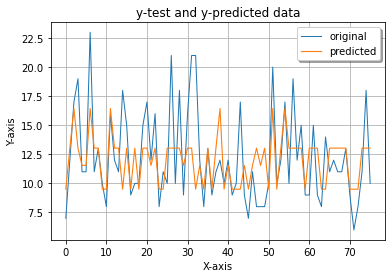

In [42]:
#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

La regresión de árbol de decisión entrena un modelo en forma de árbol a partir de las características para predecir datos nuevos. Al realizar pruebas con distintos hiperparámetros, se pudo observar que al realizar un pequeño cambio puede provocar un gran cambio en la estructura del árbol de decisión y el resultado también es muy inestable.
En este caso,el error cuadrático medio nos dió 11.64, y que fue calculado con la diferencia para cada valor LiDAR y valor medido. Consideramos que el número no es tan grande con este modelo, ya que cuanto mayor sea el número, mayor será el error y pensamos que esta técnica no es tan buena para aplicar en regresión de predecir valores continous, al no ser un conjunto de valores discretos las decisiones son más complejas y tener mejor precisión. Para el conjunto de datos que escogimos, estamos predeciendo la edad de los abulones a partir de las mediciones físicas, y al tener datos continuos y usando condiciones el resultado en realidad estuvo bueno.

2. Random Forest

In [43]:
#Dividir los datos en training y testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [44]:
#Normalizar los datos
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [45]:
#Entrenar el modelo y utilizar 10 estimadores 
regressor = RandomForestRegressor(n_estimators=10, random_state=0)
#Ajustar el modelo a los datos del training  
regressor.fit(X_train, y_train)
#Comprobar la puntuación de precisión del modelo
regressor.score(X_train, y_train)

0.8788510303022499

In [46]:
#Utilizar el modelo entrenado para predecir los datos de pruebas
y_pred = regressor.predict(X_test)

In [47]:
#Evaluar el modelo 
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSD = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("MAE: ",MAE)
print("MSE: ",MSE)
print("RMSE: ",RMSD)

MAE:  2.3629139072847685
MSE:  9.18132450331126
RMSE:  3.030070049241644


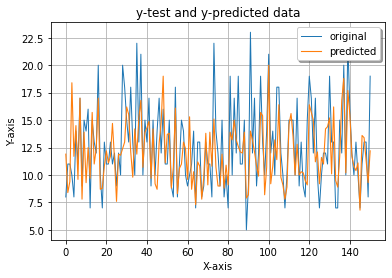

In [48]:
#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

El resultado MSE obtenido del método Random Forest es mejor que la de Decision Tree para el conjunto de datos escogido, ya que este puede manejar mejor el conjunto de datos que contiene variables continuas como se puede reflejar comparado los dos algoritmos. Al cambiar la cantidad de estimadores los resultados casi no se ven afectados como en el caso de Decision Tree. Este método trata de que las correlaciones sean bajas entre sí y por las características y los hiperparámetros pueden afectar a las correlaciones. El Random Forest selecciona los datos al azar para construir el árbol de decisión y así toma el resultado medio. No utiliza ningún conjunto de fórmulas  y reglas como en el caso de Decision Tree, y esto puede ayudar a mejorar el resultado en este conjunto de datos debido a que todas las características son númericas. 

3. Naive Bayes

In [49]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [50]:
#X_train = training.drop('Rings', axis=1)
#y_train = training.loc[:, 'Rings']
#X_test = test.drop('Rings', axis=1)
#y_test = test.loc[:, 'Rings']

In [51]:
# Init the Gaussian Classifier
model = GaussianNB()

In [52]:
# Train the model 
model.fit(X_train, y_train)

GaussianNB()

In [53]:
# Predict Output 
pred = model.predict(X_test)

Text(91.68, 0.5, 'Predicted')

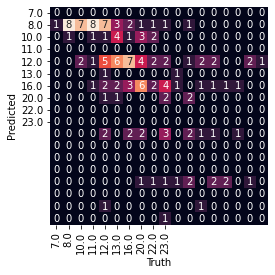

In [54]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

El resultado del análisis Naive Bayes indica una correlación a uno de los valores de entrenamiento y de predicción donde es indicada la incidencia de acuerdo a los valores de 7 al 23. Esto significa que la probalidad de obtener la variables se intensifica en los valores más altos. 

d.  Ejecutar el mismo análisis anterior pero esta vez para un método de ensamble que 
no se haya visto en clase.

4. Bagging regressor

In [55]:
#Dividir los datos en training y testing
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [56]:
#Calcular RandomForestRegressor
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
#Calcular BaggingRegressor utilizando los hiperparámetros del resultado de RandomForestRegressor,
#n_estimators, max_samples y random_state
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

In [57]:
#Ajustar el modelo a los datos del training 
clf.fit(X_train, y_train)

BaggingRegressor(base_estimator=RandomForestRegressor(max_depth=6,
                                                      n_estimators=15,
                                                      random_state=0),
                 max_samples=0.1, n_estimators=45, random_state=25)

In [58]:
#Utilizar el modelo entrenado para predecir los datos de pruebas
y_pred = clf.predict(X_test)

In [59]:
#Evaluar el modelo 
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test, y_pred)**0.5
print("MSE: ",MSE)
print("RMSE: ",RMSE)

MSE:  8.890934758971694
RMSE:  2.981767053103192


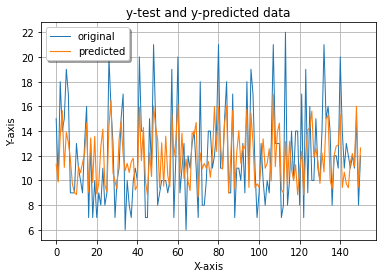

In [60]:
#Graficar las diferencias
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Bagging regressor se ajusta basando en cada uno de los subconjuntos aleatorios del conjunto de datos orginal y luego agregar las predicciones individuales para formar  una predicción final. Como se puede ver en la gráfica anterior y el resultado de MSE es muy parecido que el valor obtenido anteriormente de Random Forest, sospechamos como utilizamos bosque aleatorio como una extensión para seleccionar aleatoriamente subconjuntos de características utilizadas en cada muestra de datos pueden influir en los resultados. Haciendo pruebas creemos que es difícil obtener resultados preciosos a través de este algoritmo por su aleatoridad y al promedio de las predicciones, pero el resultado puede que sea mejor comparando con los otros métodos.Consideramos que es un buen método para realizar cálculos de regresión que en este caso sería la edad de abulones. Este método puede mejorar la precision de la predicción para los modelos de alta varianza (y bajo sesgo) a expensas de la interpretabilidad.

e.  De ser necesario el uso de métricas distintas al “accuracy” usado para clasificación, 
investigue sobre la métrica que más sentido hace para su problema y explíquela

Para esta tarea se utilizó regresión. 

Referencias:

Recarey R. (2020). Métodos de ensamblado en Machine Learning.

Scikit. (s.f.). Decision Trees. https://scikit-learn.org/stable/modules/tree.html

Simplilearn. (2022, April 22). An In-depth Guide to SkLearn Decision Trees. https://www.simplilearn.com/tutorials/scikit-learn-tutorial/sklearn-decision-trees

Jason B. (2021, April 27). How to Develop a Bagging Ensemble with Python.https://machinelearningmastery.com/bagging-ensemble-with-python/

Scikit. (s.f.). RandomForestRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html